# Colab 사용자를 위한 안내

해당 노트북은 **로컬** 환경에서 최적화 되어 있습니다. 로컬 환경에서 진행하시는 분들은 바로 학습을 진행하시면 됩니다.

Colab 을 사용하시는 분들은 처음에 아래 주석을 해제하시고 한번 만 실행시켜주세요!

* 주석을 해제하는 방법: 해당 영역을 선택하고, `Ctrl + /` 를 누르면 해당 영역의 주석에 해제됩니다.

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=False)

Colab 을 사용하시는 분들은 아래 주석을 해제하시고 `folder` 변수 명에 프로젝트 디렉토리를 저장한 위치를 작성해주세요! 예를 들어, `01_dnn_pt` 의 위치가 "내 드라이브 > colab_notebook > pytorch" 폴더 안에 있는 경우, "colab_notebook/tensorflow" 를 작성하시면 됩니다.

```python
folder = "colab_notebook/pytorch"
```

In [ ]:
# import os
# from pathlib import Path

# # folder 변수에 구글드라이브에 프로젝트를 저장한 디렉토리를 입력하세요!
# folder = ""
# project_dir = "01_dnn_pt"

# base_path = Path("/content/gdrive/My Drive/")
# project_path = base_path / folder / project_dir
# os.chdir(project_path)
# for x in list(project_path.glob("*")):
#     if x.is_dir():
#         dir_name = str(x.relative_to(project_path))
#         os.rename(dir_name, dir_name.split(" ", 1)[0])
# print(f"현재 디렉토리 위치: {os.getcwd()}")

PyTorch 는 `1.1.0` 이상 버전을 기준으로 합니다. Colab 사용시, 첫번째 코드를 실행해보시고 만약에 버전이 다르다면 두 번째 주석을 해제하고 실행해주세요.

In [ ]:
## 첫번째 코드블록
import torch 
print('pytorch version: {}'.format(torch.__version__))

In [ ]:
## 두번째 코드블록
# !pip install torch==1.1.0 torchvision==0.3.0

# Neural Network: FashoinMNIST Classifier

<img src="http://drive.google.com/uc?export=view&id=1OSa44ql8zf9kq2r_D_Q0U1WWTkMPcCgm" width="600px" height="500px" />

* 이미지 출처: 네이버
<br>
스마트 렌즈는 여러분이 찍은 이미지가 어떤 옷인지 판별하고 쇼핑과 연결지어 검색까지 해줍니다. 이러한 기술은 어떻게 만들어 지는 것일까요? 물론 복잡한 기술이 들어가겠지만 여기에는 딥러닝 기술이 포함되어 있습니다. 이번 프로젝트에서는 10 종류의 의류와 관련된 이미지를 학습시키고 판별하는 모델을 만들어 볼것입니다.     

이번 실습의 목표는 다음과 같습니다.
- [Fashion-Mnist](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 활용해 분류기를 학습한다.
- Multi layer perceptron, Batch normalization, ReLU 를 활용해 네트워크를 설계한다.

이번 과정을 통해 여러분은 PyTorch 를 이용해 분류기를 학습시키고, 학습된 모델의 성능을 검사하는 절차를 익힐 수 있습니다. 전체적인 과정은 다음과 같습니다.

- 우리가 다뤄야 할 데이터는 1x28x28 (채널x이미지 높이x이미지 너비)의 흑백 이미지입니다. 즉, 밝기값만을 가지고 있습니다.
    - 생활속에서 주로 접하게되는 컬러 이미지의 경우 빛의 3원색인 Red, Green, Blue의 3채널로 구성되어 있습니다. 일반적으로 이 3채널을 RGB채널이라고 부르며, 이 채널 값들의 조합으로 색상을 표현하게 됩니다.
- DNN(Deep Neural Network)의 입력으로 사용되기 위해서 1$\times$28$\times$28의 3차원 은 784의 1차원 데이터로(1\*28\*28=784) 변환됩니다. 
- 784차원의 입력 데이터는 DNN을 통과하여 10차원의 의류 종류를 나타내는 출력으로 변환됩니다(아래의 그림을 참고해 주세요).
- 여러분이 만들어야 하는 것은 이 DNN 구조를 PyTorch를 이용하여 설계하는 과정입니다.

<img src="http://drive.google.com/uc?export=view&id=1N691obHfLeKvP7eJ842EkMovK0O_Nu5E" width="800px" height="300px"/>
<caption><center>&lt;1$\times$28$\times$28 의 이미지를 입력으로 받아 옷의 종류를 반환하는 DNN&gt;</center></caption>

### 이제부터 본격적으로 프로젝트를 시작하겠습니다.

**"[TODO] 코드 구현"** 부분의 **"## 코드 시작 ##"** 부터 **"## 코드 종료 ##"** 구간에 필요한 코드를 작성해주세요. **나머지 작성구간이 명시 되지 않은 구간은 임의로 수정하지 마세요!**

실습코드는 Python 3.6, PyTorch 1.1 버전을 기준으로 작성되었습니다.

**본문 중간중간에 Pytorch 함수들에 대해 [Pytorch API 문서](https://pytorch.org/docs/stable/) 링크를 걸어두었습니다. API 문서를 직접 확인하는 일에 익숙해지면 나중에 여러분이 처음부터 모델을 직접 구현해야 할 때 정말 큰 도움이 됩니다.**

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab-사용자를-위한-안내" data-toc-modified-id="Colab-사용자를-위한-안내-1">Colab 사용자를 위한 안내</a></span></li><li><span><a href="#Neural-Network:-FashoinMNIST-Classifier" data-toc-modified-id="Neural-Network:-FashoinMNIST-Classifier-2">Neural Network: FashoinMNIST Classifier</a></span><ul class="toc-item"><li><span><a href="#1.-Package-load" data-toc-modified-id="1.-Package-load-2.1">1. Package load</a></span></li><li><span><a href="#2.-하이퍼파라미터-세팅" data-toc-modified-id="2.-하이퍼파라미터-세팅-2.2">2. 하이퍼파라미터 세팅</a></span></li><li><span><a href="#3.-Dataset-및-DataLoader-할당" data-toc-modified-id="3.-Dataset-및-DataLoader-할당-2.3">3. Dataset 및 DataLoader 할당</a></span></li><li><span><a href="#4.-데이터-샘플-시각화" data-toc-modified-id="4.-데이터-샘플-시각화-2.4">4. 데이터 샘플 시각화</a></span></li><li><span><a href="#5.-네트워크-설계" data-toc-modified-id="5.-네트워크-설계-2.5">5. 네트워크 설계</a></span></li><li><span><a href="#6.-Weight-initialization" data-toc-modified-id="6.-Weight-initialization-2.6">6. Weight initialization</a></span></li><li><span><a href="#7.-모델-생성" data-toc-modified-id="7.-모델-생성-2.7">7. 모델 생성</a></span></li><li><span><a href="#8.-Loss-function-및-Optimizer-정의" data-toc-modified-id="8.-Loss-function-및-Optimizer-정의-2.8">8. Loss function 및 Optimizer 정의</a></span></li><li><span><a href="#9.-Training" data-toc-modified-id="9.-Training-2.9">9. Training</a></span></li><li><span><a href="#10.-Test" data-toc-modified-id="10.-Test-2.10">10. Test</a></span></li><li><span><a href="#11.-Summary" data-toc-modified-id="11.-Summary-2.11">11. Summary</a></span></li></ul></li><li><span><a href="#Self-Review" data-toc-modified-id="Self-Review-3">Self-Review</a></span></li></ul></div>

## 1. Package load
먼저, 필요한 패키지들을 로드합니다.
각각의 패키지들의 대략적인 사용목적은 다음과 같습니다.
- [`torch`](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py): PyTorch 패키지를 불러옵니다.
- [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html): PyTorch 에서 이미지 데이터 로드와 관련된 여러가지 편리한 함수들을 제공합니다. 
- [`matplotlib.pyplot`](https://matplotlib.org/): 데이터 시각화를 위해 사용합니다. 
- [`numpy`](https://www.numpy.org/): Scientific computing과 관련된 여러 편리한 기능들을 제공해주는 라이브러리입니다.

In [4]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import check_util.checker as checker 
%matplotlib inline

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))
device = "cuda" if torch.cuda.is_available() else "cpu"   # GPU 사용 가능 여부에 따라 device 정보 저장

pytorch version: 2.4.1
GPU 사용 가능 여부: False


## 2. 하이퍼파라미터 세팅

학습에 필요한 하이퍼파리미터의 값을 초기화해줍니다. 하이퍼파라미터는 뉴럴네트워크를 통하여 학습되는 것이 아니라 학습율(learning rate), 사용할 레이어의 수 등 설계자가 결정해줘야 하는 값들을 의미합니다.

미니배치의 크기(`batch_size`), 학습 할 세대(epoch) 수(`num_epochs`), 학습률(`learning_rate`) 등의 값들을 다음과 같이 정했습니다.

In [5]:
batch_size = 100
num_epochs = 5
learning_rate = 0.001

## 3. Dataset 및 DataLoader 할당

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)는 10개의 필기체 숫자로 구성된 [MNIST 데이터](http://yann.lecun.com/exdb/mnist/)의 Fashion 버젼(version)으로 보시면 됩니다. 프로그래밍을 처음 접해보는 사람들이 주로 가장 먼저 실습해 보는 것이 "Hello, World"를 출력해보는 것이죠. 머신러닝을 처음 접해보시는 분들에게 이 "Hello, Wolrd"를 출력해보는 작업이 MNIST 데이터를 분류해보는 것이라고 비유할 수 있을 것 같습니다. 그만큼 많은 사람들이 쉽게 다운로드 받아 테스트 해볼 수 있고, 분류기들의 성능측정의 비교용으로도 많이 사용됩니다.

그러나 현재 MNIST 분류는 머신러닝 기술의 발전하면서 너무 쉬운 문제가 됐고, MNIST에서 좋은 성능을 보이는 분류기가 다른 데이터에서도 잘 작동한다고 말하기 어려운 환경이 됐습니다. 그에대한 한가지 대안으로 제시된 데이터가 Fashion-MNIST 입니다. <br>
Fashion-MNIST는 MNIST와 동일한 크기의 데이터(10개의 부류, 60,000개의 학습, 10,000개의 테스트 데이터)이지만 MNIST보다 분류하기 어려운 의류 영상데이터 입니다. Fashion-MNIST의 데이터 부류는 T-Shirts, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Bag, Ankle boot로 10개의 입니다. 

실습을 위해 [torchvision 에서 제공하는 FashionMNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.FashionMNIST) 데이터셋을 정의해주고, 전체 데이터셋을 미니배치 단위로 뉴럴넷에 공급해주도록 DataLoader를 정의합니다. 

Pytorch 의 Dataset과 DataLoader에 대해 잘 기억나지 않는다면 ['Lab-04-2'](https://www.youtube.com/watch?v=B3VG-TeO9Lk&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=8&t=0s) 강의를 참고하시기 바랍니다.

각각의 변수는 다음과 같은 의미를 갖습니다.
- `root`: FashionMNIST 데이터셋이 위치한 경로입니다. 여러분 대부분은 아직 이 데이터셋이 컴퓨터에 준비되어 있지 않을 것이지만, 걱정하실 필요 없습니다. torchvision 모듈을 통해 쉽게 다운로드 받을 수 있으며, 다운받은 데이터셋을 저장할 경로를 지정해주면 됩니다.
- `transform`: torchvision의 transforms 모듈은 다양한 이미지 전처리를 쉽게 사용할 수 있게 해줍니다. [transforms.Compose()](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=compose#torchvision.transforms.Compose)를 통해 여러 전처리 함수들을 하나로 묶어 사용할 수 있습니다. [ToTensor()](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=totensor#torchvision.transforms.ToTensor)는 이미지의 픽셀 값을 0~1 사이의 값으로 정규화하고 PyTorch의 Tensor 형태로 바꿔주는 처리를 담당합니다. [Normalize()](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=normalize#torchvision.transforms.Normalize)는 지정한 평균과 표준편차를 기준으로 데이터를 정규화해줍니다. 
- `train_data, test_data`: train 데이터와 test 데이터를 각각 정의합니다. ['Lab-04-2'](https://www.youtube.com/watch?v=B3VG-TeO9Lk&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=8&t=0s)에서 우리는 `__len__` 함수와 `__getitem__` 함수를 직접 구현해서 [Dataset class](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset)를 customize 해야 한다고 배웠습니다. 다만 FashionMNIST에 대한 Dataset class는 torchvision 모듈에 이미 구현이 되어있기 때문에 그럴 필요가 없을 뿐입니다. 

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요. 

- 훈련 데이터(train data)에 대한 [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)를 정의하고 이를 `train_loader` 변수에 저장하세요. DataLoader 객체를 정의하는 데에 사용될 수 있는 인자는 여러가지가 있습니다. 여기서는 `dataset`, `batch_size`, `shuffle`에 대한 인자를 넘겨주어 객체를 선언할 것입니다. `dataset`, `batch_size`에 우리가 미리 정의한 변수들을 활용하여 적절한 인자를 넘겨주고, 매 에폭마다 무작위로 데이터가 샘플링되도록 `shuffle`에 적절한 인자를 넘겨주세요. 
- 마찬가지로 테스트(test data)에 대한 DataLoader를 정의하여 `test_loader` 변수에 저장하되, test data는 데이터를 무작위로 샘플링할 필요가 없기 때문에 이에 주의하여 `shuffle`에 적절한 인자를 넘겨주세요.

**이제 모델에게 전달할 데이터 공급 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 `None` 부분을 채우시면 됩니다.**

In [9]:
from torch.utils.data import DataLoader

root = './data'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)
## 코드 시작 ##
train_loader = DataLoader(
    train_data,
    batch_size,
    shuffle=True,
)
test_loader = DataLoader(
    test_data,
    batch_size,
    shuffle=False,
)
## 코드 종료 ##

아래의 코드를 통해 코드를 성공적으로 완성했는지 확인해보세요. 

별다른 문제가 없다면 이어서 진행하면 됩니다.

In [10]:
checker.train_loader_check(train_loader, test_loader)

train_loader와 test_loader를 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.


## 4. 데이터 샘플 시각화

아래의 코드블록은 Fashion-MNIST 데이터를 시각화 합니다.

`labels_map`에 각 클래스의 이름과 인덱스를 파이썬 딕셔너리(dictionary)로 저장했습니다. 
7번재 줄부터 for문을 이용하여 `train_data`에 속한 데이터를 무작위로 25개 추출한 뒤 5$\times$5 격자 형태로 출력합니다.

`matplotlib`은 2D 시각화를 위한 라이브러리입니다. `matplotlib.pyplot`의 figure()를 통해 그림을 그릴 도화지를 생성할 수 있습니다. 생성된 figure 객체의 `add_subplot` 함수를 통해 전체 도화지 속에 일부 도면을 삽입할 수 있습니다. 큰 도화지 위에 작은 그림들을 구역마다 그리는 것입니다. 코드를 실행해 생성된 그림을 먼저 보시고 코드를 함께 보면 더욱 이해하기 쉬울 것입니다.
`matplotlib.pyplot`의 더 다양한 기능을 살펴보고 싶으면 [이곳](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)을 참고해주세요. 

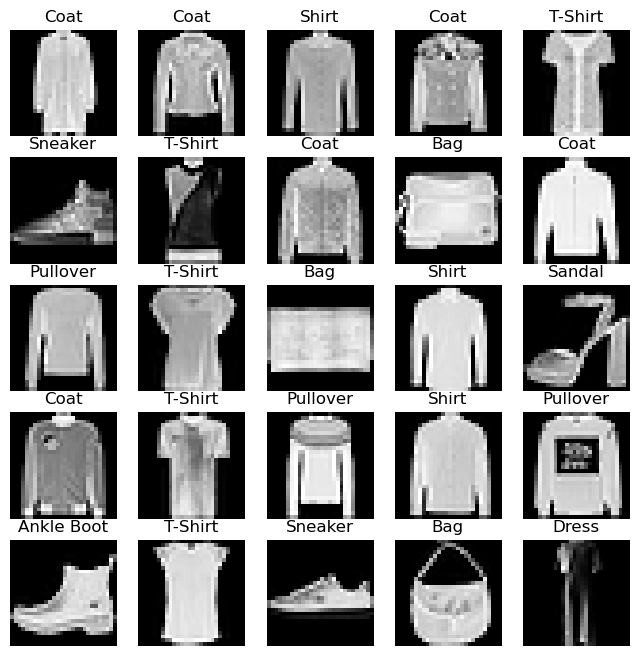

In [11]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy() # numpy()를 통해 torch Tensor를 numpy array로 변환
    label = labels_map[train_data[data_idx][1]] # item()을 통해 torch Tensor를 숫자로 변환
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 5. 네트워크 설계
학습시킬 뉴럴네트워크를 설계합니다. 
이번 실습에서는 Multi Layer Perceptron(MLP) 레이어를 2개 쌓아 네트워크를 설계할 것입니다.

MLP는 아래의 그림과 같이 한 레이어의 모든 뉴런이 다음 레이어의 뉴런과 완전히 연결된 계층(Fully connected layer)입니다. 

<img src="http://drive.google.com/uc?export=view&id=1KuQg548RFXMm1Kih46IXkKLO-q76lBdQ" width="800px" height="400px" />


MLP에 대해 잘 기억이 나지 않는다면 ['Lab-08-2'](https://www.youtube.com/watch?v=f-EtWNybRoI&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=14&t=0s)강의를 참고하시기 바랍니다.

한편, MLP의 레이어를 깊게 쌓을 때에는 반드시 비선형 activation function이 필요합니다.
이번 실습에서는 ReLU를 사용 할 것입니다. 
ReLU는 아래의 그림과 같이 음수의 입력에 대해서는 0, 양수의 입력에 대해서는 입력값을 그대로 출력하는 함수입니다.

<img src="http://drive.google.com/uc?export=view&id=14hYX4UF0Ony8apMZmN7IEkQHqP6PB-ne" width="400px" height="400px" />

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요.

- 첫번째 fully connected layer(FC layer)의 입력 feature 갯수는 입력 이미지의 픽셀 갯수인 28x28로, 출력 feature 갯수는 512로 하겠습니다. (물론 여기서 출력 feature 갯수는 여러분이 원하는대로 임의로 지정해도 좋습니다.)
- 두번째 FC layer의 출력 feature 갯수는 데이터의 class 갯수인 10으로 지정해야 합니다. 
- 그리고 첫번째 FC layer 이후에는 ReLU 함수를 적용해보세요.
- 두번째 FC layer 이후에는 ReLU activation function을 적용하지 않습니다. Classification 네트워크의 마지막 activation function은 주로 softmax 함수가 적용되기 때문입니다. 그렇다면 왜 softmax function은 네트워크 구현에 포함시키지 않는걸까요? 그 이유는 우리가 이후에 선언할 크로스엔트로피(Cross Entropy) loss function에 softmax function이 포함되도록 Pytorch에 구현이 되어있기 때문입니다. 따라서 softmax function은 우리가 따로 선언하지 않아도 됩니다. 
- 첫번째 FC Layer와 ReLU 사이에 Batch normalization(['Lab-09-4'](https://www.youtube.com/watch?v=HCEr5f-LfVE&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=18&t=0s))을 적용해보세요.
- Pytorch의 FC layer는 [여기](https://pytorch.org/docs/stable/nn.html?highlight=linear#torch.nn.Linear)를, Batch normalization는 [여기](https://pytorch.org/docs/stable/nn.html?highlight=batchnorm#torch.nn.BatchNorm1d)를, ReLu 함수는 [여기](https://pytorch.org/docs/stable/nn.html?highlight=relu#torch.nn.ReLU)를 참고하시면 됩니다. 

앞서 언급했듯이, DataLoader의 입력 데이터의 shape은 (batch_size, 1, 28, 28)입니다. 하지만 MLP의 입력은 (batch_size, 입력 feature 수)가 되어야 합니다. 따라서 우리는 Loader에서 나온 텐서의 shape을 이와 같은 형태로 변형해주어야 합니다. 이러한 변형을 flatten 이라고 부르기도 합니다. flatten 과정은 forward 함수의 `x = x.view(x.size(0), -1)` 로 구현했습니다.


**nn.Sequential 사용법 소개**

> [nn.Sequential](https://pytorch.org/docs/stable/nn.html?highlight=sequential#torch.nn.Sequential)은 여러 모듈을 하나로 묶어주는 역할을 합니다. 
> 기존에 변수를 사용하여 각각의 층을 쌓았다면, 
>
>```python
>linear_layer = nn.Linear(10, 3)
>activation_layer = nn.ReLU()
>```
>
>nn.Sequential 를 사용하면 다음과 같이 변수명을 사용하지 않고 작성하여 같은 효과를 낼 수 있습니다.
>
>```python
>nn.Sequential(
>    nn.Linear(10, 3),
>    nn.ReLU()
>)
>```

**이제 모델 코드를 작성해보세요! 각 주석에 해당하는 층을 작성하면 됩니다. "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [14]:
linear1 = nn.Linear(784, 512, bias=True)
linear2 = nn.Linear(512, 10, bias=True)
nn.BatchNorm1d(512)
nn.ReLU

class DNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DNN, self).__init__()
        self.layer1 = nn.Sequential(
            ## 코드 시작 ##
            nn.Linear(784, 512, bias=True),    # Linear_1 해당하는 층
            nn.BatchNorm1d(512),    # BatchNorm_1 해당하는 층
            nn.ReLU()     # ReLU_1 해당하는 층
            ## 코드 종료 ##
        )
        self.layer2 = nn.Sequential(
            ## 코드 시작 ##
            nn.Linear(512, 10, bias=True)    # Linear_2 해당하는 층 
            ## 코드 종료 ##
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.layer1(x)
        x_out = self.layer2(x_out)
        return x_out

아래의 코드를 실행해 코드를 성공적으로 완성했는지 확인해보세요. 

별다른 문제가 없다면 이어서 진행하면 됩니다.

In [15]:
checker.model_check(DNN())

네트워크를 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.


## 6. Weight initialization

이번 실습에서 우리는 네트워크의 weight를 [xavier_normal](https://pytorch.org/docs/stable/nn.html#torch.nn.init.xavier_normal_)으로 초기화할 것입니다. `nn.init` 모듈에는 다양한 초기화 기법들이 정의되어 있습니다. 가중치 초기화(Weight initialization)에 대해 잘 기억이 나지 않는다면 ['Lab-09-2'](https://www.youtube.com/watch?v=CJB0g_i7pYk&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=16&t=0s)강의를 참고하시기 바랍니다.

In [16]:
def weights_init(m):
    if isinstance(m, nn.Linear): # 모델의 모든 MLP 레이어에 대해서
        nn.init.xavier_normal_(m.weight) # Weight를 xavier_normal로 초기화
        print(m.weight)

## 7. 모델 생성

[model.apply()](https://pytorch.org/docs/stable/nn.html?highlight=apply#torch.nn.Module.apply)을 통해 가중치 초기화를 적용할 수 있습니다. apply 함수의 인자로 **<6. Weight initialization>** 에서 정의한 `weights_init` 함수를 주면 됩니다.

In [17]:
torch.manual_seed(7777) # 일관된 weight initialization을 위한 random seed 설정
model = DNN().to(device)
model.apply(weights_init) # 모델에 weight_init 함수를 적용하여 weight를 초기화

Parameter containing:
tensor([[-0.0437, -0.0047,  0.0671,  ..., -0.0125, -0.0129, -0.0146],
        [ 0.0727, -0.0370,  0.0367,  ...,  0.0184,  0.0512,  0.0268],
        [-0.0182,  0.0375, -0.0141,  ...,  0.0072, -0.0228,  0.0097],
        ...,
        [-0.0409,  0.0340, -0.0123,  ...,  0.0333,  0.0048,  0.0379],
        [ 0.0204, -0.0544, -0.0059,  ...,  0.0047, -0.0267,  0.0256],
        [ 0.0169,  0.0197, -0.0354,  ...,  0.0029, -0.0067, -0.0555]],
       requires_grad=True)
Parameter containing:
tensor([[-0.0367,  0.0610, -0.1070,  ...,  0.0567,  0.0033,  0.0320],
        [ 0.0578, -0.0620,  0.0097,  ...,  0.0025, -0.0586, -0.0876],
        [-0.0626,  0.0149,  0.0781,  ...,  0.0642, -0.1264, -0.0073],
        ...,
        [ 0.0134,  0.0056,  0.1168,  ...,  0.0135,  0.0050,  0.1229],
        [ 0.0017, -0.0512, -0.0223,  ..., -0.1189,  0.0555, -0.0026],
        [-0.0321, -0.0273,  0.0709,  ..., -0.1396,  0.0144, -0.0953]],
       requires_grad=True)


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)

## 8. Loss function 및 Optimizer 정의

생성한 모델을 학습 시키기 위해서 손실함수를 정의해야 합니다. 뉴럴네트워크는 경사하강(gradient descent)방법을 이용하여 손실함수의 값을 줄이는 방향으로 파라미터를 갱신(update) 하게 됩니다. 또한 효과적인 경사하강 방법을 적용하기 위해 옵티마이져를 함께 사용할 겁니다.

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요.
- `criterion` 변수에 Classification에서 자주 사용되는 [Cross Entropy Loss](https://pytorch.org/docs/stable/nn.html?highlight=entropy#torch.nn.CrossEntropyLoss)를 정의하세요. Cross Entropy에 대해 잘 기억이 나지 않는다면 ['Lab-06'](https://www.youtube.com/watch?v=B3gtAi-wlG8&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=10&t=1704s) 강의를 참고하시기 바랍니다. 
- 어떤 `optimizer`를 사용할 것인지는 설계자의 몫입니다. Adam optimizer는 많은 경우에 잘 작동하는 훌륭한 optimizer입니다. `optimizer`" 변수에 [Adam optimizer](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)를 정의하세요. **<<a href="#2.-하이퍼파라미터-세팅" data-toc-modified-id="2.-하이퍼파라미터-세팅-2.2">2. 하이퍼파라미터 세팅</a>>** 에서 정의한 `learning_rate` 를 사용하세요.

**이제 손실함수와 옵티마이저 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [32]:
import torch.optim as optim

## 코드 시작 ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
## 코드 종료 ##

아래의 코드를 실행해 코드를 성공적으로 완성했는지 확인해보세요. 

별다른 문제가 없다면 이어서 진행하면 됩니다.

In [33]:
checker.loss_func_check(criterion)
checker.optim_check(optimizer)

Cross entropy loss function을 잘 정의하셨습니다! 이어서 진행하셔도 좋습니다.
Adam optimizer를 잘 정의하셨습니다! 이어서 진행하셔도 좋습니다.


## 9. Training
이제 모델에 데이터를 미니배치 단위로 제공해서 학습을 시킬 단계입니다. 

### <font color='red'>[TODO] 코드 구현</font>

다음을 읽고 코드를 완성해보세요.

데이터를 공급해주는 `train_loader`가 `for` 문을 통해 미니 배치만큼 데이터를 가져오면, **<7. 모델 생성>** 에서 작성한 `model`에게 전달하고, 출력 값을 **<8. Loss function 및 Optimizer 정의>** 에서 작성한 손실함수 `criterion` 를 통해 손실 값을 얻습니다. 해당 손실 값을 기준으로 모델은 손실값이 적어지는 방향으로 매개변수(parameters)를 업데이트합니다. 업데이트를 수행하는 것은 `optimizer` 객체입니다. 모델을 학습하는 방법은 [문서 링크](https://pytorch.org/docs/stable/optim.html#taking-an-optimization-step) 혹은 영상 [Lab-02](https://youtu.be/kyjBMuNM1DI?t=239) 를 참고하세요!

1. 모델에 `imgs` 데이터를 주고, 그 출력을 `outputs` 변수에 저장하세요.
2. 모델의 `outputs`과 train_loader에서 제공된 `labels`를 통해 손실값을 구하고, 그 결과를 `loss` 변수에 저장하세요.
3. 이전에 계산된 gradient를 모두 clear 해줍니다.
4. Gradient를 계산합니다.
5. Optimizer를 통해 파라미터를 업데이트합니다.

**이제 각 스텝에 따라 훈련 단계 코드를 작성해보세요! "<font color='45A07A'>## 코드 시작 ##</font>"과 "<font color='45A07A'>## 코드 종료 ##</font>" 사이의 <font color='075D37'>None</font> 부분을 채우시면 됩니다.**

In [34]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        ## 코드 시작 ##
        outputs = model(imgs)  # 위의 설명 1. 을 참고하여 None을 채우세요.
        loss = criterion(outputs, labels)     # 위의 설명 2. 를 참고하여 None을 채우세요.
        
        optimizer.zero_grad()            # Clear gradients: 위의 설명 3. 을 참고하여 None을 채우세요.
        loss.backward()            # Gradients 계산: 위의 설명 4. 를 참고하여 None을 채우세요.
        optimizer.step()            # Parameters 업데이트: 위의 설명 5. 를 참고하여 None을 채우세요.
        ## 코드 종료 ##
        
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

Epoch [1/5], Step [100/600], Loss: 0.4563, Accuracy: 83.00%
Epoch [1/5], Step [200/600], Loss: 0.4440, Accuracy: 82.00%
Epoch [1/5], Step [300/600], Loss: 0.4486, Accuracy: 82.00%
Epoch [1/5], Step [400/600], Loss: 0.3292, Accuracy: 87.00%
Epoch [1/5], Step [500/600], Loss: 0.2526, Accuracy: 91.00%
Epoch [1/5], Step [600/600], Loss: 0.3507, Accuracy: 86.00%
Epoch [2/5], Step [100/600], Loss: 0.1764, Accuracy: 92.00%
Epoch [2/5], Step [200/600], Loss: 0.3466, Accuracy: 90.00%
Epoch [2/5], Step [300/600], Loss: 0.3119, Accuracy: 92.00%
Epoch [2/5], Step [400/600], Loss: 0.3338, Accuracy: 90.00%
Epoch [2/5], Step [500/600], Loss: 0.5443, Accuracy: 82.00%
Epoch [2/5], Step [600/600], Loss: 0.2791, Accuracy: 90.00%
Epoch [3/5], Step [100/600], Loss: 0.2047, Accuracy: 92.00%
Epoch [3/5], Step [200/600], Loss: 0.3847, Accuracy: 88.00%
Epoch [3/5], Step [300/600], Loss: 0.1704, Accuracy: 95.00%
Epoch [3/5], Step [400/600], Loss: 0.3333, Accuracy: 88.00%
Epoch [3/5], Step [500/600], Loss: 0.255

위의 로그에 출력되는 마지막 학습 Accuracy가 90% 전후로 나오면 코드를 잘 완성한 것입니다. 

만약에 학습이 진행이 되지 않는다면 지문과 지문에 나와있는 API문서 링크를 다시 한 번 꼼꼼히 살펴보시기 바랍니다.

문제가 없다면 다음으로 이어서 진행하시면 됩니다.

## 10. Test
마지막으로 학습된 모델의 성능을 테스트할 차례입니다. 

* [`model.eval()`](https://pytorch.org/docs/stable/nn.html?highlight=eval#torch.nn.Module.eval)은 모델을 평가(evaluation) 모드로 설정하겠다는 의미입니다. 평가 모드 가 필요한 이유는, batch normalization과 dropout이 training을 할 때와 test를 할 때 작동하는 방식이 다르기 때문입니다. 평가 모드를 설정해주어야 test를 할 때 일관된 결과를 얻을 수 있습니다.
* [`torch.no_grad()`](https://pytorch.org/docs/stable/autograd.html?highlight=torch%20no_grad#torch.autograd.no_grad)는 torch.Tensor의 [requires_grad](https://pytorch.org/docs/stable/autograd.html?highlight=requires_grad#torch.Tensor.requires_grad)를 False로 만들어줍니다. Test 때는 backpropagation을 통해 gradient를 계산할 필요가 없기 때문에, Tensor의 requires_grad를 False로 바꿔줌을 통해 메모리를 낭비하지 않을 수 있습니다. 

Test를 마친 이후에 training을 더 진행하길 원하면 [model.train()](https://pytorch.org/docs/stable/nn.html?highlight=module%20train#torch.nn.Module.train)을 통해 다시 training 모드로 설정을 해주면 됩니다. 


In [35]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 88.10%


최종 성능이 대략 88% 전후로 나오면 학습이 잘된 것으로 볼 수 있습니다.

학습된 모델의 예측 결과를 시각화하면 다음과 같습니다. 괄호안에 'O'가 있는 경우, 모델이 정확한 예측을 한 것이고 'X'인 경우는 틀린 예측을 한 것입니다. 틀린 경우에는 모델의 예측과 함께 실제 정답을 표기해두었습니다.

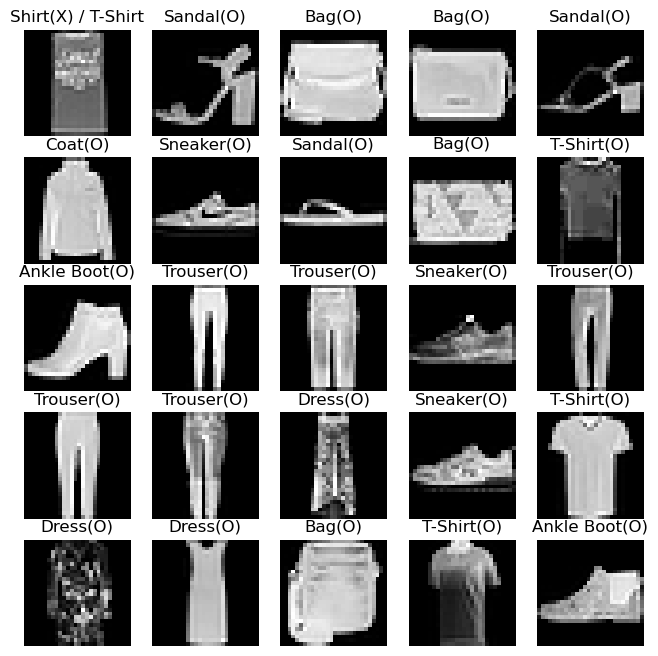

In [36]:
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_data))
    input_img = test_data[data_idx][0].unsqueeze(dim=0).to(device) 
    '''
    unsqueeze()를 통해 입력 이미지의 shape을 (1, 28, 28)에서 (1, 1, 28, 28)로 변환. 
    모델에 들어가는 입력 이미지의 shape은 (batch_size, channel, width, height) 되어야 함에 주의하세요!
    '''
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = labels_map[argmax.item()]
    label = labels_map[test_data[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + '(O)')
    else:
        plt.title(pred + '(X)' + ' / ' + label)
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap='gray')
    plt.axis('off')
model.train()
plt.show()

## 11. Summary

우리는 이번 실습을 통해 다음과 같은 내용을 학습했습니다.

- Multi layer perceptron을 설계할 수 있다.
- 네트워크에 ReLU, Batch normalization를 적용할 수 있다.
- DataLoader를 이용하여 데이터를 로드할 수 있다.
- 원하는 방식으로 가중치를 초기화할 수 있다. 
- Loss function과 optimizer를 정의할 수 있다.
- Loss를 측정하고 gradient를 계산해 모델 파라미터를 업데이트할 수 있다. 
- 학습한 모델의 성능을 test 할 수 있다. 

---

# Self-Review

여기까지 오신 여러분 잘하셨습니다! 

학습 환경에 맞춰 알맞는 제출방법을 실행하세요!

### 로컬 환경 실행자

1. 모든 실습 완료 후, Jupyter Notebook 을 `Ctrl+S` 혹은 `File > Save and checkpoint`로 저장합니다.
2. 제일 하단의 코드를 실행합니다. 주의할 점은 Jupyter Notebook 의 파일이름을 수정하시면 안됩니다! 만약에 노트북 이름을 수정했다면 "pytorch-dnn-project" 로 바꿔주시길 바랍니다. 모든 평가 기준을 통과하면, 함수 실행 후 프로젝트 "submit" 디렉토리와 압축된 "submit.zip"이 생깁니다. "dnn_submission.tsv" 파일을 열고 모두 Pass 했는지 확인해보세요!
    * "dnn_submission.tsv" : 평가 기준표에 근거해 각 세부항목의 통과여부(Pass/Fail) 파일
    * "dnn_submission.html" : 여러분이 작성한 Jupyter Notebook 을 html 형식으로 전환한 파일
3. 코드 실행결과 안내에 따라서 `submit.zip` 파일을 확인하시고 제출해주시길 바랍니다.

### Colab 환경 실행자

1. 모든 실습 완료 후, Jupyter Notebook 을 `Ctrl+S` 로 저장합니다.
2. 제일 하단의 코드를 실행합니다. 코드 실행결과 안내에 따라서 재작성하거나 다음스텝으로 넘어갑니다. 모든 평가 기준을 통과하면, 함수 실행 후 프로젝트 "submit" 디렉토리와 압축된 "dnn_submission.tsv"만 생깁니다. "dnn_submission.tsv" 파일을 열고 모두 Pass 했는지 확인해보세요!
    * "dnn_submission.tsv" : 평가 기준표에 근거해 각 세부항목의 통과여부(Pass/Fail) 파일
3. 프로젝트를 저장한 드라이브의 `submit` 폴더에서 `dnn_submission.tsv` 파일을 다운 받습니다.
4. Colab Notebook 에서 `파일 > .ipynb 다운로드`를 통해서 노트북을 다운로드 받습니다.
5. 로컬에서 Jupyter Notebook 프로그램을 실행시킵니다. 
6. 4번 스텝에서 다운받은 노트북을 열고 `File > Download as > HTML(.html)` 로 재 다운로드 합니다.
7. 3번 스텝에서 받은 파일과 6번 스텝에서 받은 파일을 하나의 폴더에 넣고, `submit.zip` 이라는 이름으로 압축하고 제출해주시길 바랍니다.

In [37]:
import check_util.submit as submit
submit.process_submit()

[ Self-Check ] 시스템: Linux
[ Self-Check ] Submit 파일 생성완료! 위치: 'submit'
[ Self-Check ] submit.zip 생성 완료!
[ Self-Check ] 모든 평가기준을 통과했습니다. 압축파일을 제출해주세요!


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
